# Training Sub-Image

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import pickle
import matplotlib.patches as patches

import warnings
warnings.filterwarnings('ignore')

%matplotlib widget

## Import next quantum

In [2]:
filename = 'sources_0.obj'

with open('unlabeled_data/'+filename, 'rb') as f:
    sources = pickle.load(f)

## Sub-image batch widget

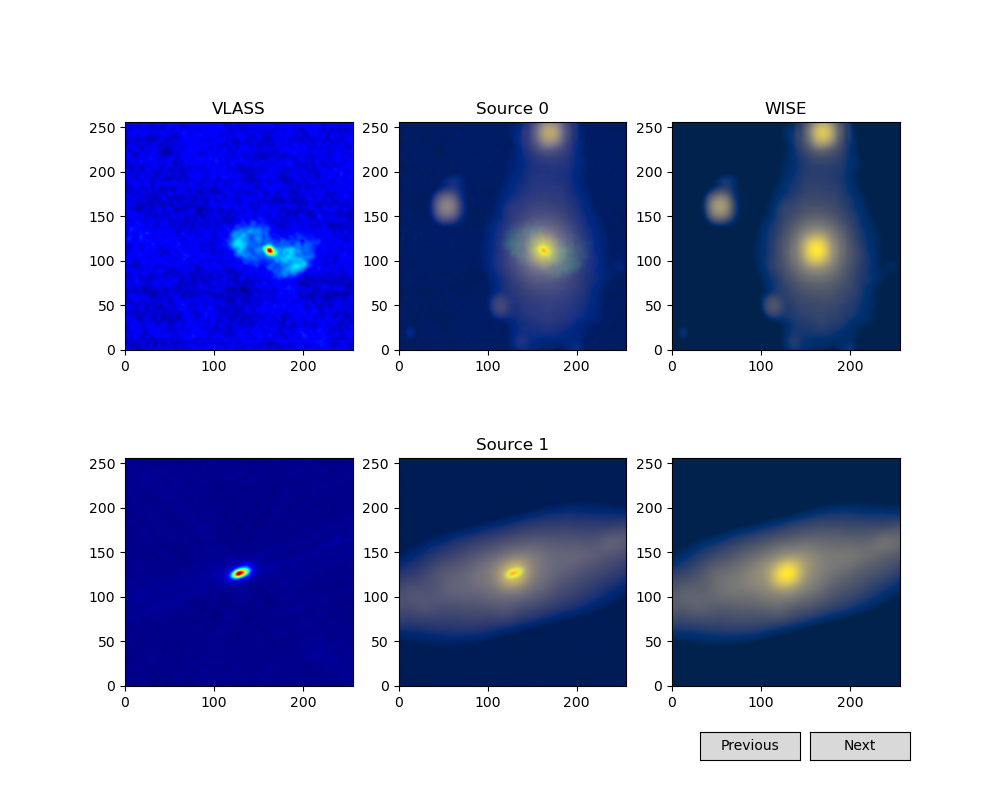

In [16]:
plt.close()

sourceLength = len(sources)
nSources = 2

fig, ax = plt.subplots(nSources, 3, figsize=(10, 8))
ax[0][0].set_title('VLASS')
ax[0][1].set_title('VLASS + WISE')
ax[0][2].set_title('WISE')

class Index:
    ind = 0

    def next(self, event):
        for i in range(nSources):
            sources[i+self.ind].setAllCoords(int(ax[i][1].get_xlim()[0]), int(ax[i][1].get_xlim()[1]), 
                int(ax[i][1].get_ylim()[0]), int(ax[i][1].get_ylim()[1]))

        self.ind += nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def prev(self, event):
        self.ind -= nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def showFigures(self):
        for i in range(nSources):
            vlass_im = sources[i+self.ind].images[0].data
            wise_im = np.log10(sources[i+self.ind].images[1].data - np.min(sources[i+self.ind].images[1].data))
            wise_im = np.clip(wise_im, np.median(wise_im), np.inf)
            wise_im -= np.min(wise_im)
            wise_im /= np.max(wise_im) # Don't do this for model

            ax[i][0].imshow(vlass_im, origin='lower', cmap='jet')
            ax[i][0].set_xlim(0, 256); ax[i][0].set_ylim(0, 256)

            ax[i][1].title.set_text('Source '+str(i+self.ind))
            ax[i][1].imshow(wise_im, origin='lower', cmap='cividis')#, norm=mpl.colors.LogNorm(vmin=np.median(wise_im), clip=True))
            ax[i][1].imshow(vlass_im, origin='lower', cmap='jet', alpha=0.15)
            ax[i][1].set_xlim(0, 256); ax[i][1].set_ylim(0, 256)

            ax[i][2].imshow(wise_im, origin='lower', cmap='cividis')#, norm=mpl.colors.LogNorm(vmin=np.median(wise_im), clip=True))
            ax[i][2].set_xlim(0, 256); ax[i][2].set_ylim(0, 256)

callback = Index()
callback.showFigures()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.035])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.035])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

## Save to training data file

In [ ]:
with open('labeled_data/'+filename, 'wb') as f:
        pickle.dump(sources, f)

## Test coordinate saving

In [ ]:
with open('labeled_data/sources_0.obj', 'rb') as f:
    sources = pickle.load(f)

plt.close()
plt.imshow(sources[0].images[0].data, origin='lower', cmap='jet')
plt.xlim(sources[0].images[0].x0, sources[0].images[0].x1)
plt.ylim(sources[0].images[0].y0, sources[0].images[0].y1)
plt.show()

In [ ]:
plt.close()

sourceLength = len(sources)
nSources = 3

fig, ax = plt.subplots(nSources, 3, figsize=(10, 12))
ax[0][0].set_title('VLASS')
ax[0][1].set_title('VLASS + WISE')
ax[0][2].set_title('WISE')

class Index:
    ind = 0

    def next(self, event):
        for i in range(nSources):
            sources[i+self.ind].setAllCoords(int(ax[i][1].get_xlim()[0]), int(ax[i][1].get_xlim()[1]), 
                int(ax[i][1].get_ylim()[0]), int(ax[i][1].get_ylim()[1]))

        self.ind += nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def prev(self, event):
        self.ind -= nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def showFigures(self):
        for i in range(nSources):
            (x0,x1) = (sources[i+self.ind].images[0].x0, sources[i+self.ind].images[0].x1)
            (y0,y1) = (sources[i+self.ind].images[0].y0, sources[i+self.ind].images[0].y1)
            ax[i][0].imshow(sources[i+self.ind].images[0].data, origin='lower', cmap='jet')
            ax[i][0].set_xlim(0, 256); ax[i][0].set_ylim(0, 256)

            ax[i][1].title.set_text('Source '+str(i+self.ind))
            ax[i][1].imshow(sources[i+self.ind].images[1].data, origin='lower', cmap='cividis')
            ax[i][1].imshow(sources[i+self.ind].images[0].data, origin='lower', cmap='jet', alpha=0.2)
            ax[i][1].set_xlim(x0, x1)
            ax[i][1].set_ylim(y0, y1)

            ax[i][2].cla()
            ax[i][2].imshow(sources[i+self.ind].images[1].data, origin='lower', cmap='cividis')
            ax[i][2].set_xlim(0, 256); ax[i][2].set_ylim(0, 256)
            
            # Create a Rectangle patch
            rect = patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1, edgecolor='r', facecolor='none')

            # Add the patch to the final image
            ax[i][2].add_patch(rect)

callback = Index()
callback.showFigures()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.035])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.035])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

In [ ]:
print(sources[0].images[0].x0, sources[0].images[0].x1)